# MATH 693A Homework 1
## Audrey Oliver


### Question 1

Hi Mom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Question 1

In [3]:
# Question 1
#f(x)
fx= lambda x: (100*(x[1]-x[0]**2)**2 + (1-x[0])**2)

#---------- SD eqns --------------#
dfx1= lambda x: (400*(x[0]**3) + 2*x[0] - 400*x[0]*x[1] -2)
dfx2= lambda x: (200*x[1] - 200*(x[0]**2))
def gradient(x):
    return np.array([dfx1(x), dfx2(x)])


def alpha_SD(xk, alpha0, rho, c):
    alpha=alpha0
    pk= -gradient(xk)/np.linalg.norm(gradient(xk))
    while (fx(xk + alpha*pk) > fx(xk) + c*alpha* np.matmul(np.transpose(pk), gradient(xk))):
        alpha*=rho
    return alpha, pk


def bt_ls_SD(x0, tol, fx, alpha0, rho, c):
    k=0
    xk=x0
    alpha_vals=[]
    pk_vals=[]
#     xk_vals=[]
    f_xk=[]
    k_vals=[]
    
    while  np.linalg.norm(gradient(xk)) > tol:
        alpha, pk= alpha_SD(xk, alpha0, rho, c) 
        alpha_vals.append(alpha)
        pk_vals.append(pk)
        f_xk.append(fx(xk))
        xk_vals.append(xk)
        k_vals.append(k+1)
#         print('iteration: ', k)
        xk += alpha * pk
        k += 1 

    return (k_vals, xk_vals, f_xk, pk_vals, alpha_vals)
        

In [4]:
#Question 1a code

fx= lambda x: (100*(x[1]-x[0]**2)**2 + (1-x[0])**2)
#---------- SD eqns --------------#
dfx1= lambda x: (400*(x[0]**3) + 2*x[0] - 400*x[0]*x[1] -2)
dfx2= lambda x: (200*x[1] - 200*(x[0]**2))
def gradient(x):
    return np.array([dfx1(x), dfx2(x)])
#------------ Newton Eqns ---------------#
d2fx1x1= lambda x: (1200*(x[0]**2) + 2 - 400*x[1])
d2fx1x2= lambda x: (- 400*x[0])
d2fx2x1= lambda x: (-400*x[0])
d2fx2x2= 200
def hessian(x):
    return np.array([[d2fx1x1(x), d2fx1x2(x)],[d2fx2x1(x),d2fx2x2]])

#----------- alpha defs ------------#
# steepest descent
def alpha_SD(xk, alpha0, rho, c):
    alpha=alpha0
    pk= -gradient(xk)/np.linalg.norm(gradient(xk))
    while (fx(xk + alpha*pk) > fx(xk) + c*alpha* np.matmul(np.transpose(pk), gradient(xk))):
        alpha*=rho
    return alpha, pk

# newton
def alpha_N(xk, alpha0, rho, c):
    alpha=alpha0
    inv_hess= np.linalg.inv(hessian(xk))
    pk= -np.matmul(inv_hess,gradient(xk))
    while (fx(xk + alpha*pk) > fx(xk) + c*alpha* np.matmul(np.transpose(pk), gradient(xk))):
        alpha*=rho
    return alpha, pk

#----------- Backtracking linesearch defs ---------#
# Steepest descent
def bt_ls_SD(x0, tol, alpha0, rho, c):
    k=0
    xk=x0
    alpha_vals=[]
    pk_vals=[]
    xk_vals=[]
    f_xk=[]
    k_vals=[]
    
    while  np.linalg.norm(gradient(xk)) > tol:
        alpha, pk= alpha_SD(xk, alpha0, rho, c) 
        alpha_vals.append(alpha)
        pk_vals.append(pk)
        f_xk.append(fx(xk))
        xk_vals.append(xk.copy())
        k_vals.append(k+1)
#         print('iteration: ', k)
        xk += alpha * pk
        k += 1 
    return (k_vals, xk_vals, f_xk, pk_vals, alpha_vals)

# Newton
def bt_ls_N(x0, tol, alpha, rho, c):
    k=0
    xk=x0
    alpha_vals=[]
    pk_vals=[]
    xk_vals=[]
    f_xk=[]
    k_vals=[]
    
    while  np.linalg.norm(gradient(xk)) > tol:
        alpha, pk= alpha_N(xk, alpha0, rho, c) 
        alpha_vals.append(alpha)
        pk_vals.append(pk)
        f_xk.append(fx(xk))
#         print(xk)
        xk_vals.append(xk.copy())
#         print("\n", xk_vals)
        k_vals.append(k+1)
#         print('iteration: ', k)
        xk += alpha * pk
#         print(xk)
        k += 1 

    return (k_vals, xk_vals, f_xk, pk_vals, alpha_vals)
        

## Solutions Question 1a and Question 2

In [5]:
# Newtons method, [1.2,1.2] Answer Q1a(i-ii) and Q2
alpha0= 1
rho= 1/2
c= 10e-4
x0=np.array([1.2,1.2])
tol=10e-8

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_N(x0, tol, alpha0, rho, c)

print('first 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[:6], 'xk' : xk[:6], 'f(xk)': f_xk[:6], 'pk': pk_vals[:6], 'alpha': alpha_vals[:6]}))
print('last 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[-6:], 'xk' : xk[-6:], 'f(xk)': f_xk[-6:], 'pk': pk_vals[-6:], 'alpha': alpha_vals[-6:]}))


first 6 values of x_k:
   iter                                        xk     f(xk)  \
0     1                                [1.2, 1.2]  5.800000   
1     2  [1.1959183673469396, 1.4302040816326547]  0.038384   
2     3  [1.0982844943705703, 1.1966881275598962]  0.018762   
3     4   [1.0644881592588216, 1.131992848935248]  0.004289   
4     5  [1.0119921151302134, 1.0213722064365702]  0.000903   
5     6   [1.004261087025132, 1.0084805621173385]  0.000019   

                                               pk  alpha  
0     [-0.00408163265306034, 0.23020408163265474]    1.0  
1      [-0.19526774595273835, -0.467031908145517]    0.5  
2    [-0.033796335111748836, -0.0646952786246482]    1.0  
3   [-0.052496044128608234, -0.11062064249867781]    1.0  
4  [-0.0077310281050813785, -0.01289164431923184]    1.0  
5  [-0.004210752701676294, -0.008397621375197454]    1.0  
last 6 values of x_k:
   iter                                        xk         f(xk)  \
0     3  [1.0982844943705703, 1.1

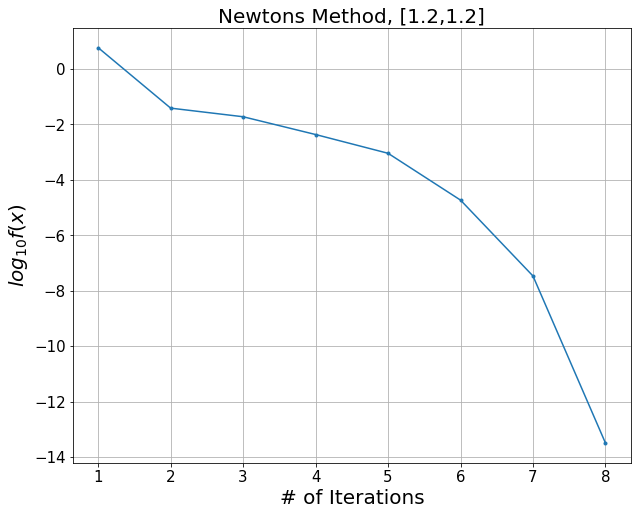

In [91]:
fig=plt.figure(figsize=(10,8))
plt.plot(k_vals,(np.log10(f_xk)),'.-')
plt.xlabel('# of Iterations',fontsize=20)
plt.ylabel(r'$log_{10}f(x)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Newtons Method, [1.2,1.2]', fontsize=20)
plt.grid()
plt.show()

fig.savefig('Newton_1.2_1.2.png')

In [8]:
# Newtons method, [-1.2,1] Answer Q1a(iii-iv) and Q2
alpha0= 1
rho= 1/2
c= 10e-4
x0=np.array([-1.2,1.0])
tol=10e-8

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_N(x0, tol, alpha0, rho, c)

print('first 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[:6], 'xk' : xk[:6], 'f(xk)': f_xk[:6], 'pk': pk_vals[:6], 'alpha': alpha_vals[:6]}))
print('last 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[-6:], 'xk' : xk[-6:], 'f(xk)': f_xk[-6:], 'pk': pk_vals[-6:], 'alpha': alpha_vals[-6:]}))


first 6 values of x_k:
   iter                                           xk      f(xk)  \
0     1                                  [-1.2, 1.0]  24.200000   
1     2     [-1.1752808988764052, 1.380674157303372]   4.731884   
2     3    [-0.9329814276198303, 0.8112106557970067]   4.087399   
3     4    [-0.7825400789708397, 0.5897363758123608]   3.228673   
4     5      [-0.459997119069936, 0.107563388571005]   3.213898   
5     6  [-0.39304563414149996, 0.15000236918357118]   1.942585   

                                           pk  alpha  
0    [0.02471910112359473, 0.380674157303372]  1.000  
1    [1.9383957700525998, -4.555708012050923]  0.125  
2  [0.1504413486489906, -0.22147427998464592]  1.000  
3  [0.32254295990090365, -0.4821729872413558]  1.000  
4  [0.06695148492843608, 0.04243898061256618]  1.000  
5   [0.7345349001579569, -0.5729289699291724]  0.250  
last 6 values of x_k:
   iter                                        xk         f(xk)  \
0    16  [0.8634908081044917, 0.7

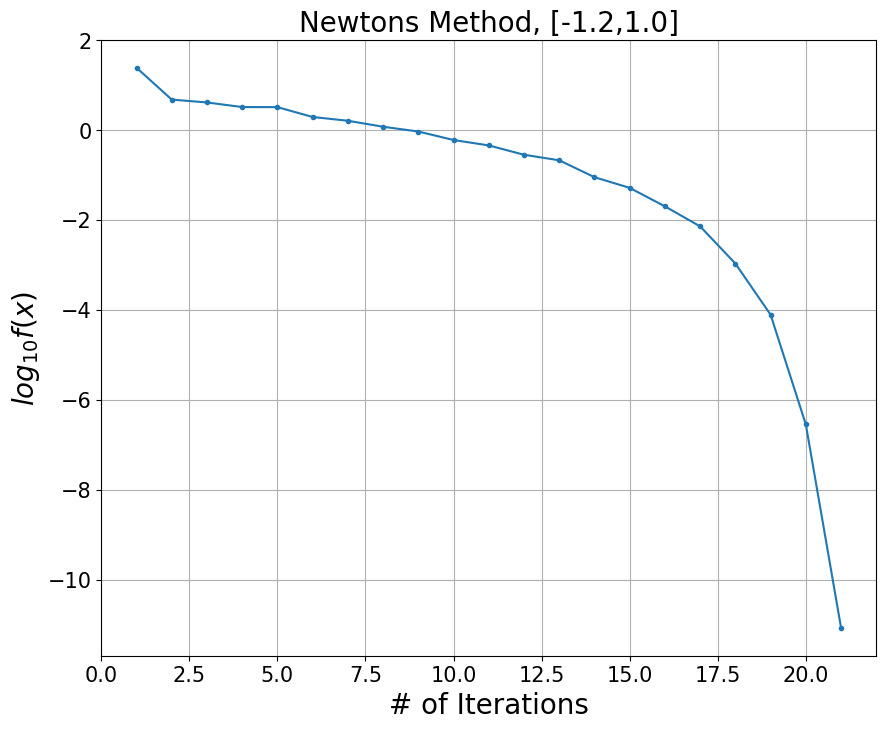

In [9]:
fig=plt.figure(figsize=(10,8))
plt.plot(k_vals,(np.log10(f_xk)),'.-')
plt.xlabel('# of Iterations',fontsize=20)
plt.ylabel(r'$log_{10}f(x)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Newtons Method, [-1.2,1.0]', fontsize=20)
plt.grid()
plt.show()

fig.savefig('Newton_1.2_1.0.png')

In [104]:
# Steepest Descent method, [1.2,1.2] Answer Q1a(v-vi) and Q2
alpha0= 1
rho= 1/2
c= 10e-4
x0=np.array([1.2,1.2])
tol=10e-8

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_SD(x0, tol, alpha0, rho, c)

print('first 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[:6], 'xk' : xk[:6], 'f(xk)': f_xk[:6], 'pk': pk_vals[:6], 'alpha': alpha_vals[:6]}))
print('last 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[-6:], 'xk' : xk[-6:], 'f(xk)': f_xk[-6:], 'pk': pk_vals[-6:], 'alpha': alpha_vals[-6:]}))


first 6 values of x_k:
   iter                                        xk     f(xk)  \
0     1                                [1.2, 1.2]  5.800000   
1     2  [1.0845563802189657, 1.2479350670371077]  0.520845   
2     3  [1.1129084899380834, 1.2347927546654163]  0.014172   
3     4   [1.111092579236144, 1.2355118969240875]  0.012439   
4     5  [1.1114530640103137, 1.2351825501361977]  0.012424   
5     6  [1.1109672597446012, 1.2352316703409718]  0.012410   

                                           pk     alpha  
0  [-0.9235489582482737, 0.38348053629686135]  0.125000  
1   [0.9072675110117673, -0.4205539958941216]  0.031250  
2   [-0.9297462793930069, 0.3682008364396537]  0.001953  
3   [0.7382728174998537, -0.6745022215981411]  0.000488  
4  [-0.9949271361792876, 0.10059817937756786]  0.000488  
5   [0.7379677257277141, -0.6748360065855004]  0.000488  
last 6 values of x_k:
    iter                                        xk         f(xk)  \
0  16336  [1.0000000322656246, 1.000000

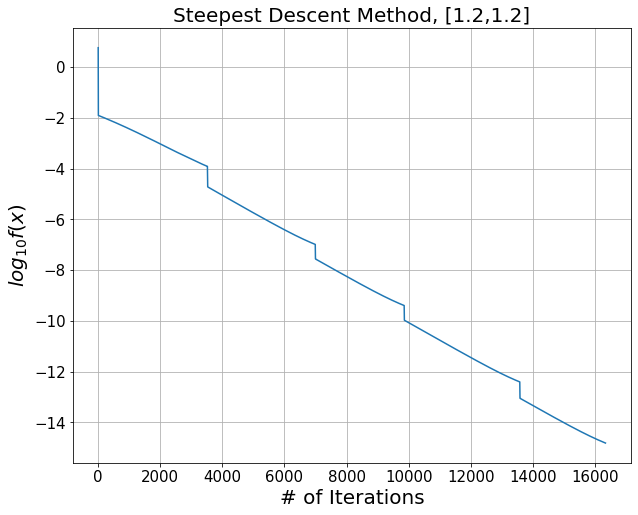

In [87]:
fig=plt.figure(figsize=(10,8))
plt.plot(k_vals,(np.log10(f_xk)),'-')
plt.xlabel('# of Iterations',fontsize=20)
plt.ylabel(r'$log_{10}f(x)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Steepest Descent Method, [1.2,1.2]', fontsize=20)
plt.grid()
plt.show()

fig.savefig('SD_1.2_1.2.png')

In [105]:
# Steepest Descent method, [1.2,1.2] Answer Q1a(v-vi) and Q2
alpha0= 1
rho= 1/2
c= 10e-4
x0=np.array([-1.2,1.0])
tol=10e-8

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_SD(x0, tol, alpha0, rho, c)

print('first 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[:6], 'xk' : xk[:6], 'f(xk)': f_xk[:6], 'pk': pk_vals[:6], 'alpha': alpha_vals[:6]}))
print('last 6 values of x_k:')
print(pd.DataFrame({'iter': k_vals[-6:], 'xk' : xk[-6:], 'f(xk)': f_xk[-6:], 'pk': pk_vals[-6:], 'alpha': alpha_vals[-6:]}))


first 6 values of x_k:
   iter                                         xk      f(xk)  \
0     1                                [-1.2, 1.0]  24.200000   
1     2   [-0.9685380890762003, 1.094474249356653]   6.321495   
2     3  [-1.0779672079639393, 1.0340568020466823]   5.955234   
3     4   [-1.020578428602165, 1.0588111552671886]   4.112427   
4     5  [-1.0257012582300993, 1.0529127001429073]   4.103538   
5     6  [-1.0178969717451134, 1.0525545539293768]   4.098937   

                                            pk     alpha  
0     [0.9258476436951985, 0.3778969974266118]  0.250000  
1  [-0.8754329511019115, -0.48333957847976644]  0.125000  
2    [0.9182204697883883, 0.39606965152810075]  0.062500  
3   [-0.6557221923755722, -0.7550022559080026]  0.007812  
4   [0.9989486700781974, -0.04584271533188962]  0.007812  
5   [-0.6286634183205803, -0.7776775080105398]  0.007812  
last 6 values of x_k:
    iter                                        xk         f(xk)  \
0  16601   [1.0000

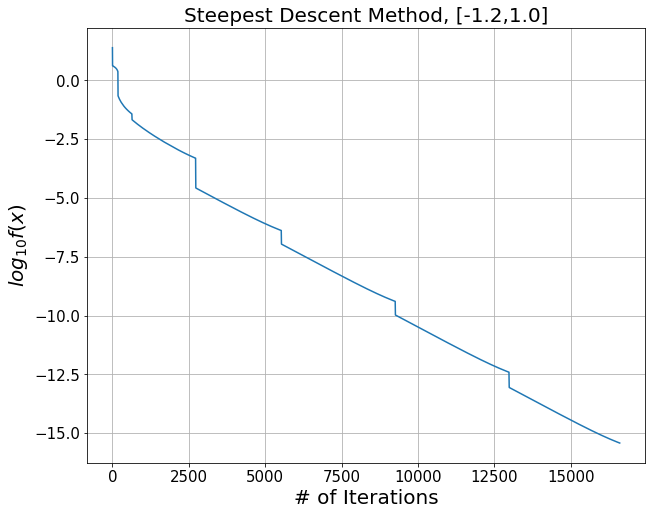

In [85]:
fig=plt.figure(figsize=(10,8))
plt.plot(k_vals,(np.log10(f_xk)),'-')
plt.xlabel('# of Iterations',fontsize=20)
plt.ylabel(r'$log_{10}f(x)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Steepest Descent Method, [-1.2,1.0]', fontsize=20)
plt.grid()
plt.show()

fig.savefig('SD_1.2_1.0.png')

In [106]:
# Question 1b - change stop criteria
#----------- Backtracking linesearch defs ---------#
# Steepest descent
def bt_ls_SD(x0, tol, alpha0, rho, c):
    k=0
    xk=x0
    alpha_vals=[]
    pk_vals=[]
    xk_vals=[]
    f_xk=[]
    k_vals=[]
    
    while  np.abs(fx(xk)) > tol:
        alpha, pk= alpha_SD(xk, alpha0, rho, c) 
        alpha_vals.append(alpha)
        pk_vals.append(pk)
        f_xk.append(fx(xk))
        xk_vals.append(xk.copy())
        k_vals.append(k+1)
#         print('iteration: ', k)
        xk += alpha * pk
        k += 1 
    return (k_vals, xk_vals, f_xk, pk_vals, alpha_vals)

# Newton
def bt_ls_N(x0, tol, alpha, rho, c):
    k=0
    xk=x0
    alpha_vals=[]
    pk_vals=[]
    xk_vals=[]
    f_xk=[]
    k_vals=[]
    
    while  np.abs(fx(xk)) > tol:
        alpha, pk= alpha_N(xk, alpha0, rho, c) 
        alpha_vals.append(alpha)
        pk_vals.append(pk)
        f_xk.append(fx(xk))
#         print(xk)
        xk_vals.append(xk.copy())
#         print("\n", xk_vals)
        k_vals.append(k+1)
#         print('iteration: ', k)
        xk += alpha * pk
#         print(xk)
        k += 1 

    return (k_vals, xk_vals, f_xk, pk_vals, alpha_vals)


In [113]:
alpha0= 1
rho= 1/2
c= 10e-4
tol=10e-8

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_N(np.array([1.2,1.2]), tol, alpha0, rho, c)
print("# of iterations for N, [1.2,1.2]:", k_vals[-1])

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_N(np.array([-1.2,1.0]), tol, alpha0, rho, c)
print("# of iterations for N, [-1.2,1.0]:", k_vals[-1])

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_SD(np.array([1.2,1.2]), tol, alpha0, rho, c)
print("# of iterations for SD, [1.2,1.2]:", k_vals[-1])

k_vals, xk, f_xk, pk_vals, alpha_vals = bt_ls_SD(np.array([-1.2,1.0]), tol, alpha0, rho, c)
print("# of iterations for SD, [-1.2,1.0]:", k_vals[-1])

# of iterations for N, [1.2,1.2]: 6
# of iterations for N, [-1.2,1.0]: 20
# of iterations for SD, [1.2,1.2]: 6993
# of iterations for SD, [-1.2,1.0]: 5584


## Question 3A

In [130]:
# solved for grad and hessian by hand

hessF=np.array([[4,5],[5,12]])
eigvals, eigvecs= np.linalg.eig(hessF)
print(eigvals)

[ 1.59687576 14.40312424]


#### Solving by hand 
$\begin{bmatrix} 4 - \lambda & 5 \\ 5 & 12- \lambda \end{bmatrix}$



$$ (4-\lambda)(12-\lambda) - 25 $$
$$ \lambda^2 - 4\lambda - 12\lambda +48 -25 $$ 
$$ \lambda^2 - 16\lambda +23 $$

In [176]:
def quad(a,b,c):
    ans1= (-b/(2*a)) + (np.sqrt((b**2) - (4*a*c)))/(2*a)
    ans2= (-b/(2*a)) - (np.sqrt((b**2) - (4*a*c)))/(2*a)
    return print('eigenvalues are: ', ans1,ans2)

quad(1,-16,23)

x, y, z = sp.symbols('x, y, z')

fun1 = x**2 -16*x +23
display(sp.solve(fun1,x))
print(8 - np.sqrt(41),8 + np.sqrt(41))

eigenvalues are:  14.403124237432849 1.5968757625671515


[8 - sqrt(41), sqrt(41) + 8]

1.5968757625671515 14.403124237432849


## Question 3B

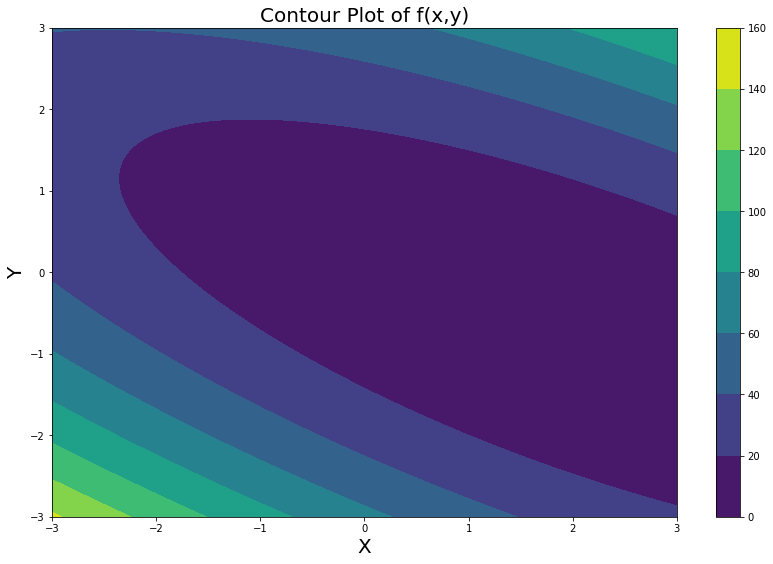

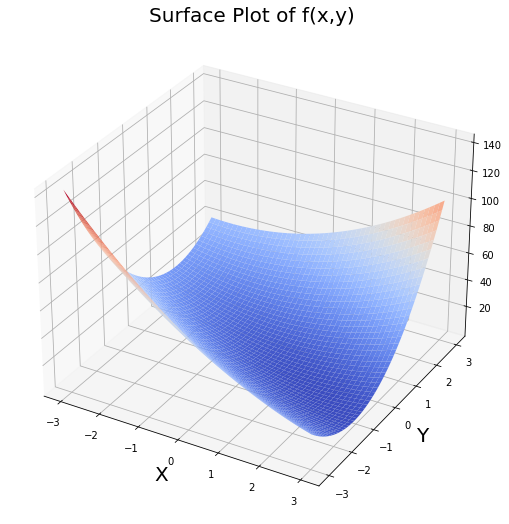

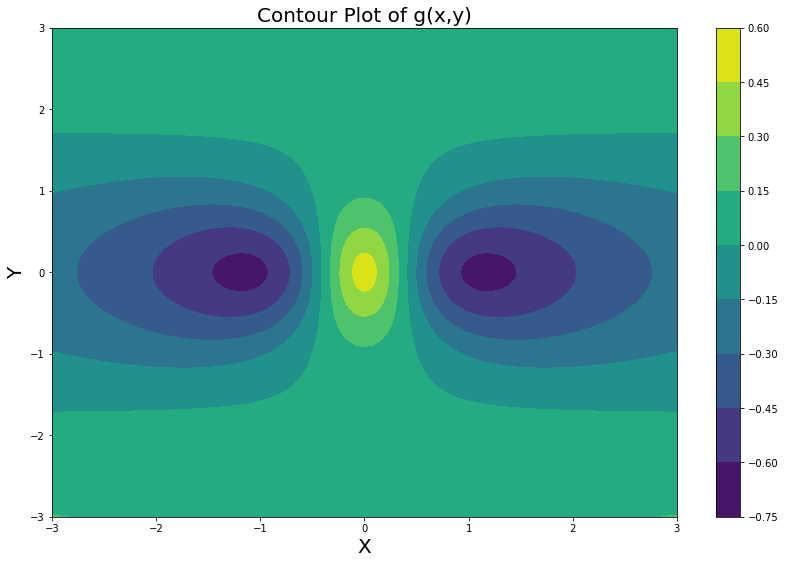

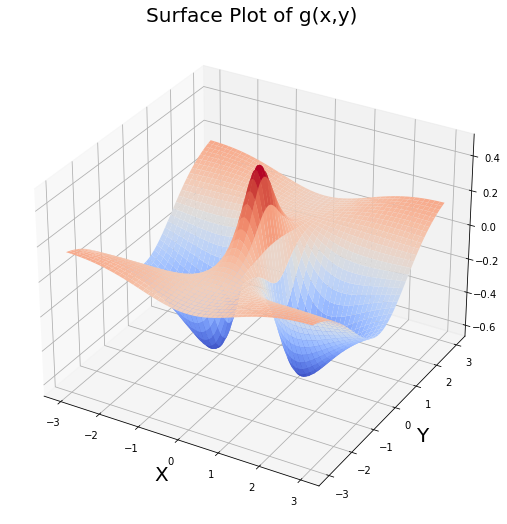

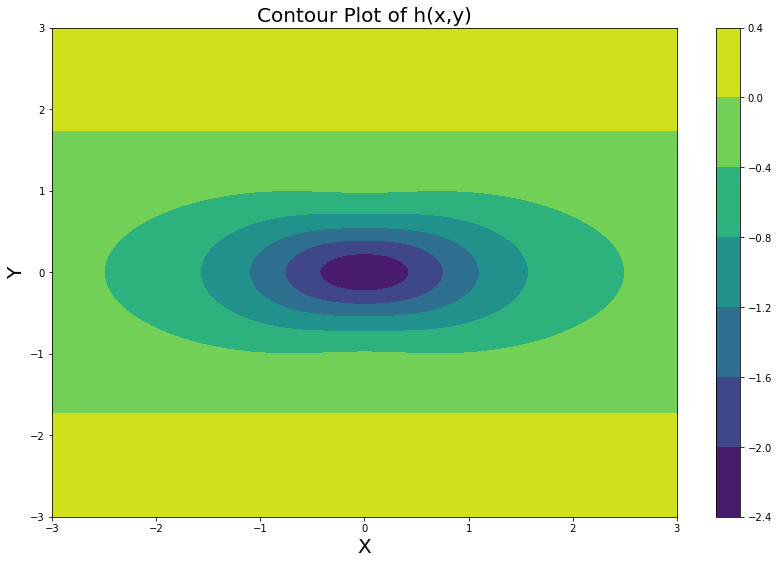

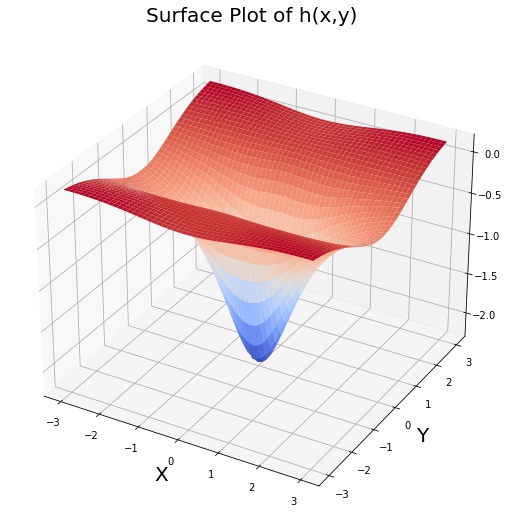

In [122]:


x=np.linspace(-3,3,1000)
y=np.linspace(-3,3,1000)
X, Y = np.meshgrid(x, y)

fXY= 5- 5*X - 2*Y + 2*(X**2) + 5*X*Y + 6*(Y**2)
gXY= ((X**2 - 0.5) +(Y**2 -3) + (X**2 -1)*(Y**2 -4)) / (X**2 + Y**2 + 1)**2
hXY= ((X**2 - 0.25) +(Y**2 -3) + (X**2 -0.25)*(Y**2 -4)) / (X**2 + Y**2 + 1)**2

#contour and surface plot for f(x,y):
fig = plt.figure(figsize =(14, 9))
plt.contourf(X,Y,fXY)
plt.title('Contour Plot of f(x,y)',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.colorbar()
plt.show()
fig.savefig('contourF.png')

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, fXY, cmap=cm.coolwarm)
ax.set_title('Surface Plot of f(x,y)',fontsize=20)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
plt.show()
fig.savefig('surfF.png')

#contour and surface plot for g(x,y):
fig = plt.figure(figsize =(14, 9))
plt.contourf(X,Y,gXY)
plt.title('Contour Plot of g(x,y)',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.colorbar()
plt.show()
fig.savefig('contourG.png')

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, gXY, cmap=cm.coolwarm)
ax.set_title('Surface Plot of g(x,y)',fontsize=20)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
plt.show()
fig.savefig('surfG.png')

#contour and surface plot for h(x,y):
fig = plt.figure(figsize =(14, 9))
plt.contourf(X,Y,hXY)
plt.title('Contour Plot of h(x,y)',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.colorbar()
plt.show()
fig.savefig('contourH.png')

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, hXY, cmap=cm.coolwarm)
ax.set_title('Surface Plot of h(x,y)',fontsize=20)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
plt.show()
fig.savefig('surfH.png')



## Question 5

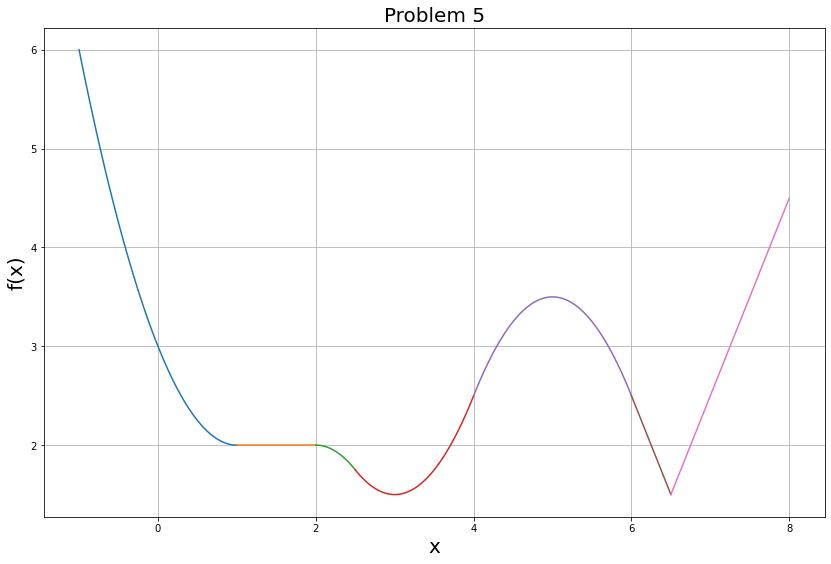

In [126]:
x1=np.linspace(-1,1,100)
fx1=(x1-1)**2 + 2
x2=np.linspace(1,2,100)
fx2= x2*0 + 2
x3= np.linspace(2,2.5,100)
fx3= -(x3-2)**2 + 2
x4= np.linspace(2.5,4,100)
fx4= (x4-3)**2 + 1.5
x5=np.linspace(4,6,100)
fx5= -(x5-5)**2 + 3.5
x6=np.linspace(6,6.5,100)
fx6= -2*x6 + 14.5
x7=np.linspace(6.5,8,100)
fx7=2*x7 - 11.5

fig = plt.figure(figsize =(14, 9))
plt.plot(x1,fx1)
plt.plot(x2,fx2)
plt.plot(x3,fx3)
plt.plot(x4,fx4)
plt.plot(x5,fx5)
plt.plot(x6,fx6)
plt.plot(x7,fx7)
plt.grid()
plt.title('Problem 5', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.show()
fig.savefig('Q5.png')


## Question 6

In [170]:
# solved eqns by hand, then solved for eigenvalues using sympy:
import sympy as sp

#matrix A
x, y, z = sp.symbols('x, y, z')

fun1 = -x**3 + 11*x**2 -23*x +13
display(sp.solve(fun1,x))

[1, 5 - 2*sqrt(3), 2*sqrt(3) + 5]

In [169]:
lam1=5 - 2*np.sqrt(3)
lam2=2*np.sqrt(3) + 5
print(lam1,lam2)

1.5358983848622456 8.464101615137753


In [171]:
# matrix B
fun2= -x**3 + 3*x**2 +12*x 
display(sp.solve(fun2,x))

[0, 3/2 - sqrt(57)/2, 3/2 + sqrt(57)/2]

In [172]:
lam1=3/2 - np.sqrt(57)/2
lam2= 3/2 + np.sqrt(57)/2
print(lam1,lam2)

-2.274917217635375 5.274917217635375


In [174]:
# Matrix C
fun3= -x**3 - 12*x**2 - 45*x -50
display(sp.solve(fun3,x))

[-5, -2]